In [1]:
# MY TEMPLATE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', palette= 'Set2')

# DATA SPLITTING

from sklearn.model_selection import train_test_split

# PREPROCESSING

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

import category_encoders as ce

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Model Evaluation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score, confusion_matrix, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost.sklearn import XGBClassifier

# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Pickling

import pickle

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df = df.loc[:5000, ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [4]:
df.shape

(5001, 16)

In [50]:
# A. EDA (25 Poin)

Batasan Data untuk Ujian

    Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].
    Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

Jalankan Exploratory Data Analysis untuk:

    Memahami profil tamu/konsumen hotel (customer profiling).
    Memahami kebiasaan tamu/konsumen hotel (customer behavior).

Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke manajemen hotel!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5001 non-null   object 
 1   is_canceled                  5001 non-null   int64  
 2   adults                       5001 non-null   int64  
 3   children                     5001 non-null   float64
 4   babies                       5001 non-null   int64  
 5   meal                         5001 non-null   object 
 6   country                      4999 non-null   object 
 7   market_segment               5001 non-null   object 
 8   distribution_channel         5001 non-null   object 
 9   reserved_room_type           5001 non-null   object 
 10  booking_changes              5001 non-null   int64  
 11  deposit_type                 5001 non-null   object 
 12  days_in_waiting_list         5001 non-null   int64  
 13  customer_type     

In [7]:
df.describe(include='O')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5001,5001,4999,5001,5001,5001,5001,5001
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5001,3418,3175,2156,3657,3167,4461,3700


In [8]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.459708,1.969806,0.115577,0.014797,0.207159,1.771646,0.093781,0.601880
std,0.498424,1.566170,0.444791,0.122397,0.612435,13.544026,0.292922,0.823206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

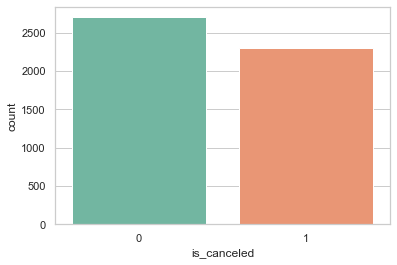

In [9]:
sns.countplot(df.is_canceled)

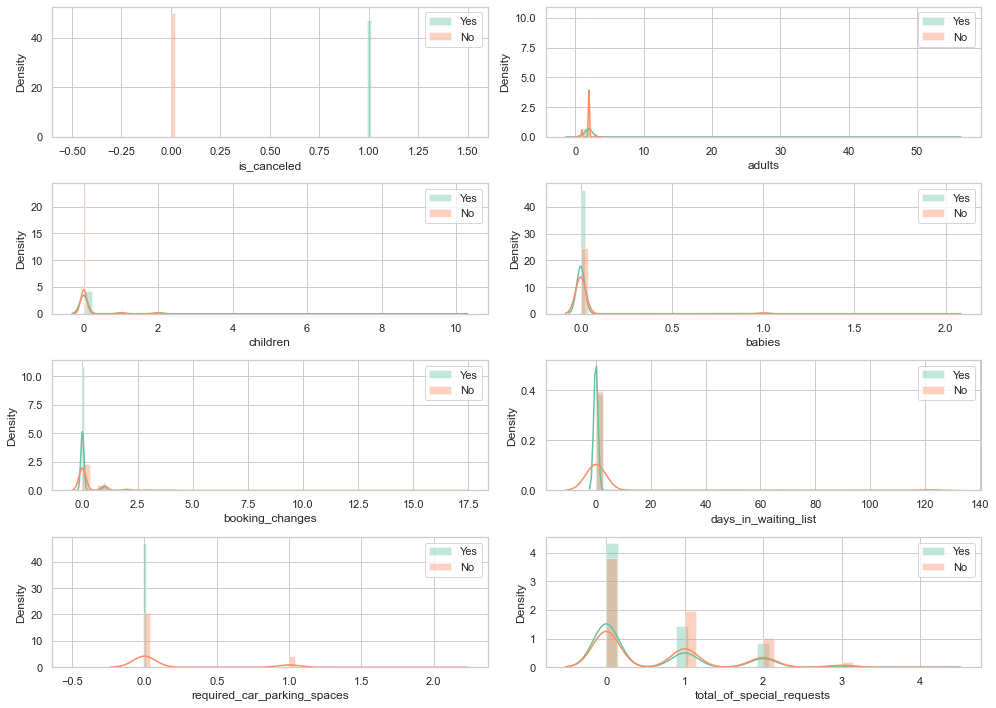

In [10]:
numerical_features = df.describe().columns

plt.figure(figsize=(14,10))

num_codes = {}

for i in range(len(numerical_features)) :
    num_codes[numerical_features[i]] = i

for features, i in num_codes.items() :
    plt.subplot(4, 2, i+1)
    sns.distplot(df.loc[df.is_canceled == 1, features], label='Yes')
    sns.distplot(df.loc[df.is_canceled == 0, features], label = 'No')
    plt.legend()
    
plt.tight_layout()

<AxesSubplot:xlabel='customer_type', ylabel='count'>

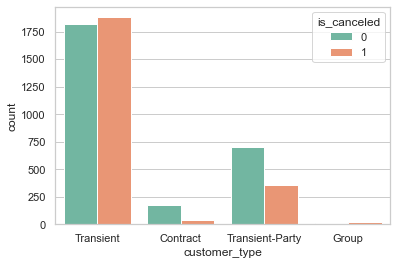

In [11]:
sns.countplot(df.customer_type, hue = df.is_canceled)

customer dengan tipe Transient-Party dan contact memiliki kemungkinan lebih banyak untuk batal / cancel meskipun secara rasio keduanya tidak sebanyak customer dengan type transient. customer bertipe transient memiliki kemungkinan cancel hampir sama dan customer bertipe group meskipun sangat sedikit dibanding dengan customer tipe lain, namun terlihat bahwa customer tipe ini sangat kecil kemungkinan untuk batal

In [12]:
top5country = df.country.value_counts().head(5).index

<AxesSubplot:xlabel='country', ylabel='count'>

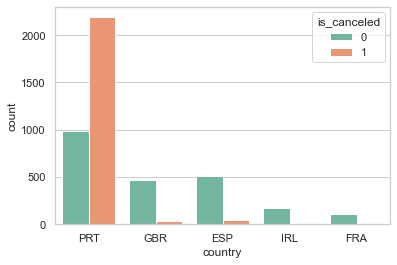

In [13]:
sns.countplot(df.loc[df.country.isin(top5country)].country, hue = df.is_canceled)

berdasarkan visualisasi diatas diambil berdasarkan 5 negara dengan jumlah booking terbanyak. terlihat bahwa negara portugal menduduki peringkat 1, tidak hanya itu, kemungkinan untuk cancel pemesanan hotel juga lebih sedikit, tidak seperti trend pada negara negara lainnya, bahkan penyumbang "tidak cancel" terbayak berasal dari portugal.

berbeda dengan portugal, negara irlandia dan perancis hampir tidak ada yang tidak cancel

<AxesSubplot:xlabel='market_segment', ylabel='count'>

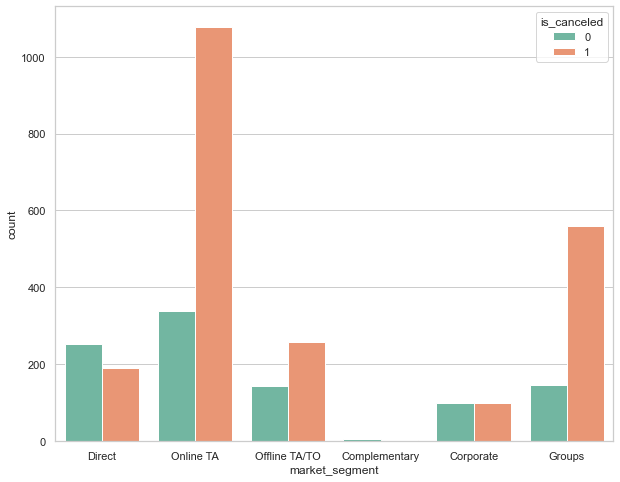

In [14]:
plt.figure(figsize=(10,8))

sns.countplot(data = df.loc[df.country == 'PRT'], x='market_segment', hue = 'is_canceled')

dikarenakan mayoritas pemesanan terjadi berasal dari portugal membuat saya cukup penasaran dengan behavior customer dari negara ini.

pertama yang saya lakukan adalah melihat segmen pasar di negara portugal. kebanyakan dari segment online dengan kemungkinan batal cukup rendah. kedua disusul oleh segmen Groups dan offline dengan behavior yang sama, meskipun jumlah pemesanan offline tidak sebanyak keduanya dan kemungkinan untuk batal lebih tinggi.

segmen corporate memiliki sekitar 50% kemungkinan untuk batal.

segment direct memiliki kemungkinan cancel lebih banyak daripada yang tidak. 

<AxesSubplot:xlabel='customer_type', ylabel='count'>

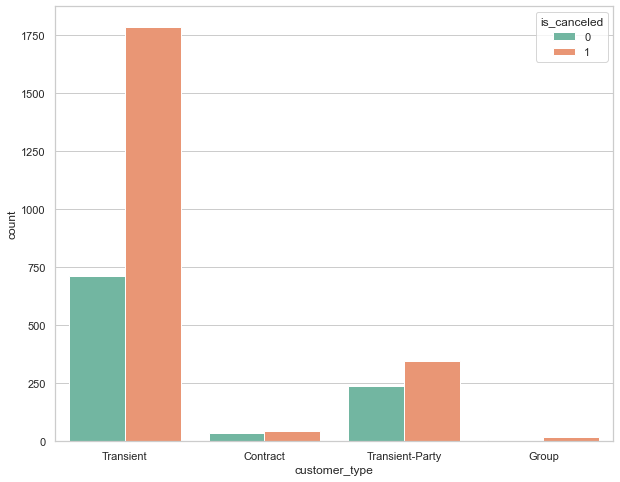

In [15]:
plt.figure(figsize=(10,8))

sns.countplot(data = df.loc[df.country == 'PRT'], x='customer_type', hue = 'is_canceled')

jauh berbeda dengan analisa keseluruhan dataset, customer_type transient di portugal memiliki kemungkinan lebih kecil untuk cancel, dan customer dengan tipe transient-party bahkan memiliki ratio tidak cancel jauh lebih besar

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

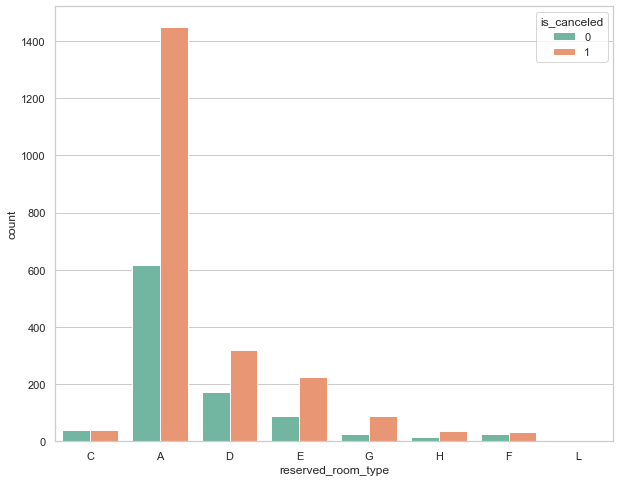

In [83]:
plt.figure(figsize=(10,8))

sns.countplot(data = df.loc[df.country == 'PRT'], x='reserved_room_type', hue = 'is_canceled')

disini terlihat bahwa tipe ruangan A paling diminati oleh customer yang berasal dari negara portugal. di figure ini kita juga dapat melihat trend yang sama tiap kamar dengan jumlah ratio cancel dan tidak yang hampir identical. perbedaan jelas terlihat pada ruangan C dimana ruangan C memiliki ratio 50:50

sepertinya customer portugal kurang minal terhadap kamar type L

# B. Data Cleaning & Preprocessing (15 poin)

## DATA SPLITING

In [17]:
X = df.drop(columns='is_canceled')

In [18]:
X.shape

(5001, 15)

In [19]:
y = df.is_canceled

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

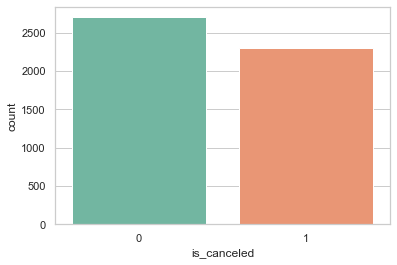

In [20]:
sns.countplot(y)

In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2020,
    stratify = y)

## PREPROCESSING

In [22]:
df.describe(include='O')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5001,5001,4999,5001,5001,5001,5001,5001
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5001,3418,3175,2156,3657,3167,4461,3700


In [23]:
df.reserved_room_type.value_counts()

A    3167
D     848
E     540
G     169
C     109
F     101
H      63
L       3
P       1
Name: reserved_room_type, dtype: int64

In [24]:
binary_pip = Pipeline([

    ('most_frequent', SimpleImputer(strategy='most_frequent')),
    ('binary_enc', ce.BinaryEncoder())

])

transformer = ColumnTransformer([
    
    ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']),
    ('binary', binary_pip, ['country'])
    
    ], remainder='passthrough')


transformer.fit(X_train_val)

onehot_features = transformer.transformers_[0][1].get_feature_names()
binary_features = transformer.transformers_[1][1].steps[1][1].get_feature_names()
transformer.transformers_[2]
passthrough_features = ['is_canceled', 'adults', 'children', 'reserved_room_type','deposit_type', 'customer_type', 'required_car_parking_spaces']

features = list(onehot_features) + binary_features + passthrough_features

### Penjelasan Preprocess

hal pertama yang dilakukan adalah membuat pipeline untuk mengisi null value di country, mengingat jumlah kategori country terlalu banyak, maka dalam pipeline juga diputuskan untuk menggunakan binary encoder pada step setelah mengisi null value

step selanjutnya adalah membuat columntransformer untuk melakukan mentransform semua features categorical menjadi numerical dengan one-hot encoder kecuali country karena sudah include dalam step didalam pipeline. feature reserved_room_type memiliki category P yang hanya 1 data saja, maka diputuskan untuk tidak menggunakan drop first namun menggunakan handle_unknown = 'ignore' untuk mencegah data tidak dikenali di test set saat kategori P hanya di train dan sebaliknya.

selanjutnya adalah mengambil nama semua features yang sudah di transform, tujuannya untuk nanti bila diperlukan untuk melihat feature importance(classification model) atau coefficients(regression model)

# C. Model Benchmark & Evaluation Metric (40 poin)

## MODEL EVALUATION

Pilihlah setidaknya 3 model machine learning yang Anda pahami, untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan cancel booking atau tidak! Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

LOGISTIC REGRESSION : merupakan model linear untuk mengatasi permasalahan classification, cara kerja yang hampir sama seperti multiple linear regression memungkinkan kita untuk melakukan prediksi yang akurat bila features memiliki hubungan linear dengan target

RANDOM FOREST CLASSIFIER : merupakan tree-based ensemble model dimana model mengambil features secara acak dan melakukan train tiap tree secara independent kemudian mengkombinasikan hasilnya di akhir proses

GRADIENT BOOSTING CLASSIFIER : merupakan tree-based ensemble model, sama seperti random forest hanya saja jika random forest membuat tree independent dan menggabungkan di akhir proses, gradient boosting akan membuat tree satu persatu dan mengkombinasikan hasilnya, kemudian lanjut membangun tree lainnya.

TAMBAHAN :

dilakukan Scaling mengingat setiap features memiliki scale yang berbeda, terlihat juga beberapa outliers di features" yang ada oleh karena itu dalam hal ini diputuskan untuk menggunakan RobustScaler

target variable sebenarnya sudah lumayan imbang, namun dalam model ini saya melakukan sedikit eksperimen apakah resampling mampu memberikan hasil yang lebih baik daripada tidak, hasil yang didapat adalah terjadi peningkatan ( meskipun tidak terlalu signifikan ) ketika melakukan proses oversampling menggunakan SMOTE.

In [25]:
models = {
    
    'Logistic Regression' : LogisticRegression(random_state=2020),
    'Random Forest' : RandomForestClassifier(random_state=2020),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=2020),
}

In [80]:
skfold = StratifiedKFold(n_splits=5)

for name, model in models.items() :

    estimator = Pipeline([
        
        ('preprocess', transformer),
        ('scaling', RobustScaler()),
        ('balancer', SMOTE()),
        ('model', model)
        ])

    score = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'recall', cv = skfold)

    print(f'\nMODEL : {name}')
    print(f'CV SCORE : {score}')
    print(f'CV SCORE MEAN : {score.mean()}')
    print(f'CV SCORE STD : {score.std()}\n')


MODEL : Logistic Regression
CV SCORE : [0.92663043 0.94836957 0.95108696 0.92663043 0.95095368]
CV SCORE MEAN : 0.9407342139556925
CV SCORE STD : 0.011556370507195362


MODEL : Random Forest
CV SCORE : [0.88586957 0.91576087 0.91032609 0.88858696 0.90735695]
CV SCORE MEAN : 0.9015800852979506
CV SCORE STD : 0.012054884233091076


MODEL : Gradient Boosting
CV SCORE : [0.95108696 0.95652174 0.95652174 0.93206522 0.94822888]
CV SCORE MEAN : 0.9488849070015399
CV SCORE STD : 0.008998041545943147



In [82]:
for name, model in models.items() : 

    estimator = Pipeline([

        ('preprocess', transformer),
        ('scaling', RobustScaler()),
        ('balancer', SMOTE()),
        ('model', model)
    ])

    estimator.fit(X_train_val, y_train_val)

    print(f'\nMODEL : {name}\n')

    print(f'{recall_score(y_test, estimator.predict(X_test))}\n')

    print(f'{classification_report(y_test, estimator.predict(X_test))}\n')


MODEL : Logistic Regression

0.9282608695652174

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       541
           1       0.78      0.93      0.85       460

    accuracy                           0.84      1001
   macro avg       0.85      0.85      0.84      1001
weighted avg       0.86      0.84      0.84      1001



MODEL : Random Forest

0.8978260869565218

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       541
           1       0.82      0.90      0.86       460

    accuracy                           0.86      1001
   macro avg       0.86      0.86      0.86      1001
weighted avg       0.86      0.86      0.86      1001



MODEL : Gradient Boosting

0.9521739130434783

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       541
           1       0.79      0.95      0.87       460

    accuracy                          

a. Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda!

b. Pilih evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!

jenis kesalahan yang dipilih untuk diselesaikan oleh model-model di kasus ini adalah jenis kesalahan kedua dimana Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).

Alasan : lebih menguntungkan pihak hotel untuk mengetahui pesanan pesanan yang batal daripada mengetahui pesanan yang tidak batal, karena jika terdeteksi tidak batal, maka pihak hotel harus penyempatkan waktu untuk menelpon customer, mempersiapkan kamar sesuai pesanan, terutama menolak pengunjung lain yang akan memesan kamar tersebut. model ini akan mempermudah pihak manajemen hotel untuk mengidentifikasi pesanan yang batal sehingga tidak perlu melakukan proses proses diatas, meskipun tetap pada prakteknya, perlu dilakukan konfirmasi lebih lanjut kepada pihak customer

Evaluation metric yang mampu untuk menekan permasalahan diatas adalah recall. recall atau juga bisa disebut True Positive Rate akan memberikan informasi persentase true positive dan bila model ini mampu memberikan recall score yang cukup baik maka artinya model mampu menekan persentase False negative

# D. Hyper-parameter Tuning (20 poin)

## HYPERPARAMETER TUNING

In [46]:
hyperparam_space_gradient = {
    'model__min_samples_leaf' : [2,5,10,15,20,50],
    'model__min_samples_split' : [2,5,10,15,20,50],
    'model__max_depth' : [2,3,4,5,6,7]
}

In [47]:
estimator = Pipeline([

    ('preprocess', transformer),
    ('scaling', RobustScaler()),
    ('balancer', SMOTE()),
    ('model', models['Gradient Boosting'])
])

grid_search_gradient = GridSearchCV(
    estimator,
    param_grid=hyperparam_space_gradient,
    n_jobs= -1,
    scoring='recall',
    cv = skfold
)

grid_search_gradient.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                              

In [51]:
grid_search_gradient.best_params_

{'model__max_depth': 2,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 15}

In [48]:
grid_search_gradient.best_score_

0.9619372704655846

In [49]:
grid_search_gradient.best_estimator_.fit(X_train_val, y_train_val)

print(recall_score(y_test, grid_search_gradient.predict(X_test)))

print(classification_report(y_test, grid_search_gradient.predict(X_test)))

0.9521739130434783
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       541
           1       0.77      0.95      0.85       460

    accuracy                           0.85      1001
   macro avg       0.86      0.86      0.85      1001
weighted avg       0.87      0.85      0.85      1001



In [55]:
estimator = Pipeline([

    ('preprocess', transformer),
    ('scaling', RobustScaler()),
    ('balancer', NearMiss()),
    ('model', models['Gradient Boosting'])
])

estimator.fit(X_train_val, y_train_val)

print(f'\nMODEL : {name}\n')

print(f'{recall_score(y_test, estimator.predict(X_test))}\n')

print(f'{classification_report(y_test, estimator.predict(X_test))}\n')


MODEL : Gradient Boosting

0.9478260869565217

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       541
           1       0.77      0.95      0.85       460

    accuracy                           0.85      1001
   macro avg       0.86      0.85      0.85      1001
weighted avg       0.86      0.85      0.85      1001




<AxesSubplot:>

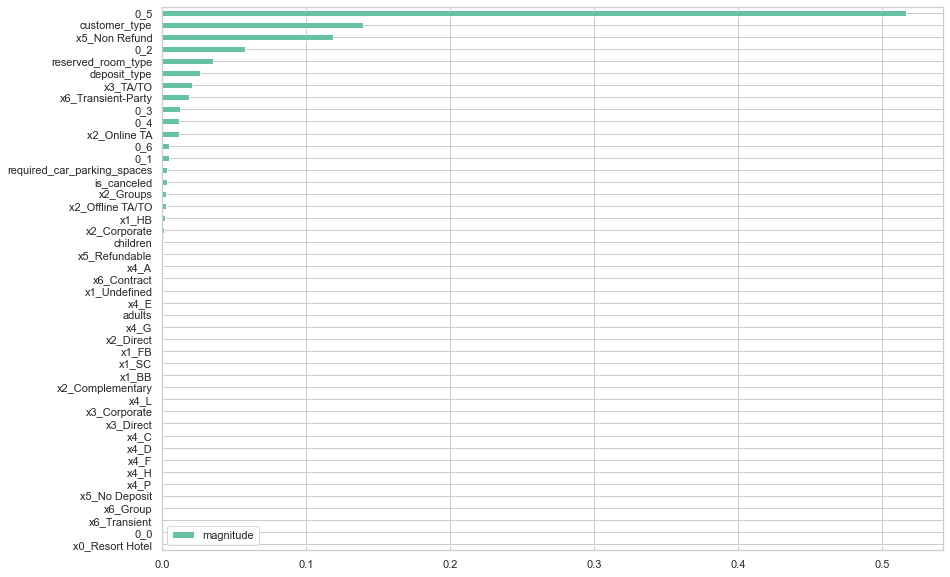

In [70]:
pd.DataFrame({'magnitude' : grid_search_gradient.best_estimator_.fit(X_train_val, y_train_val)[3].feature_importances_}, index = features).sort_values('magnitude').plot(kind = 'barh', figsize = (14,10))

Setelah Anda memilih benchmark model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! Parameter apa saja yang anda pilih untuk tunning? Jelaskan maksud dari tiap-tiap parameter tersebut!

min_samples_split : min_samples_split adalah minimum jumlah sample untuk split di tiap internal node tiap tree

min_samples_leaf : min_samples_leaf adalah minumum jumlah sample untuk menjadi leaf, ketika sudah mencapai leaf, maka meskipun belum mencapai max_depth, tree tetap akan berhenti

max_depth : max_depth adalah tingkat kedalaman tree, atau sampai level berapa tree akan split

Bagaimana performa model Anda setelah Hyper-parameter Tuning? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan cancel booking atau tidak!

bahkan sebelum dilakukan tuning, performa model yang dipilih (dalam hal ini Gradient Boosting Classifier) sudah cukup baik dengan recall score : 95%. ketika dilakukan tuning, terjadi penurunan walau tidak signifikan

